# Flow Prediction using sequential neural network

In [93]:
# import the necessary libraries import numpy as np
from google.colab import files 
import numpy as np
import matplotlib.pyplot as plt

In [94]:
#get the input data
my_data=np.load("./re_200_vel_mag_2.npy")
print(my_data.shape)

(5000, 100)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

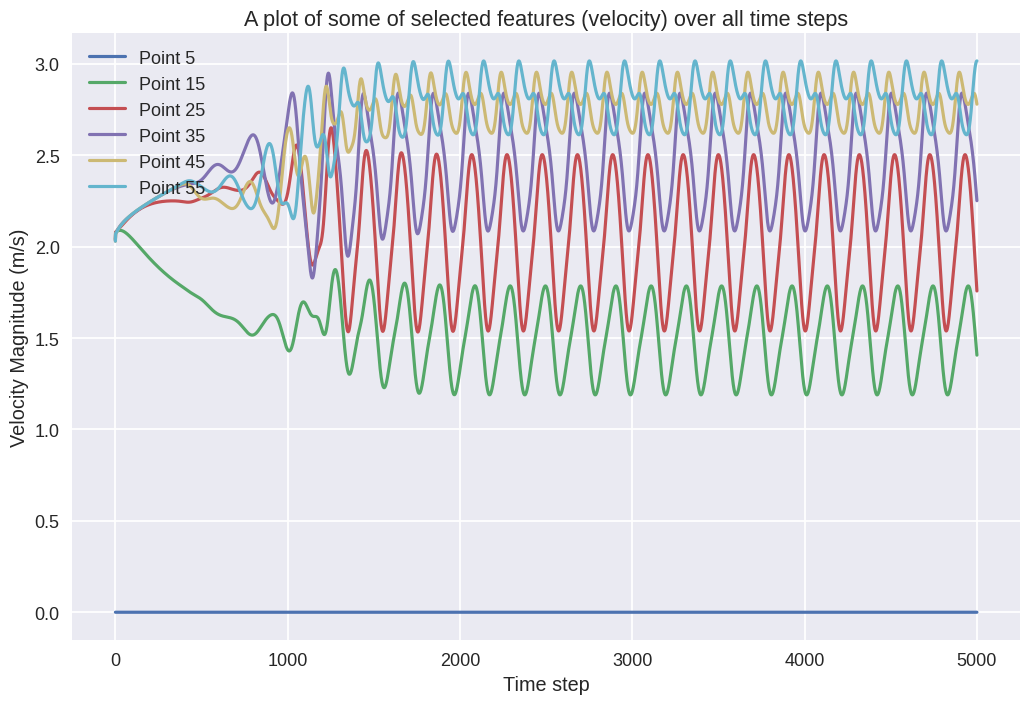

In [103]:
# data visualization
plt.style.use('seaborn-v0_8-talk')
x_axis=range(1,5001)
fid, ax=plt.subplots()
for index in range(5,60,10):
  ax.plot(x_axis,my_data[:,index],label="Point " + str(index))

ax.legend(loc='upper left')
ax.set_title("A plot of some of selected features (velocity) over all time steps")
ax.set_xlabel("Time step")
ax.set_ylabel("Velocity Magnitude (m/s)")
plt.tight_layout()
plt.savefig("./before_trim.png")
files.download("before_trim.png") 
plt.show()

In [97]:
#checking the sum of row
col_sums = np.sum(my_data, axis=0)

print(col_sums.shape)

(100,)


<function matplotlib.pyplot.show(close=None, block=None)>

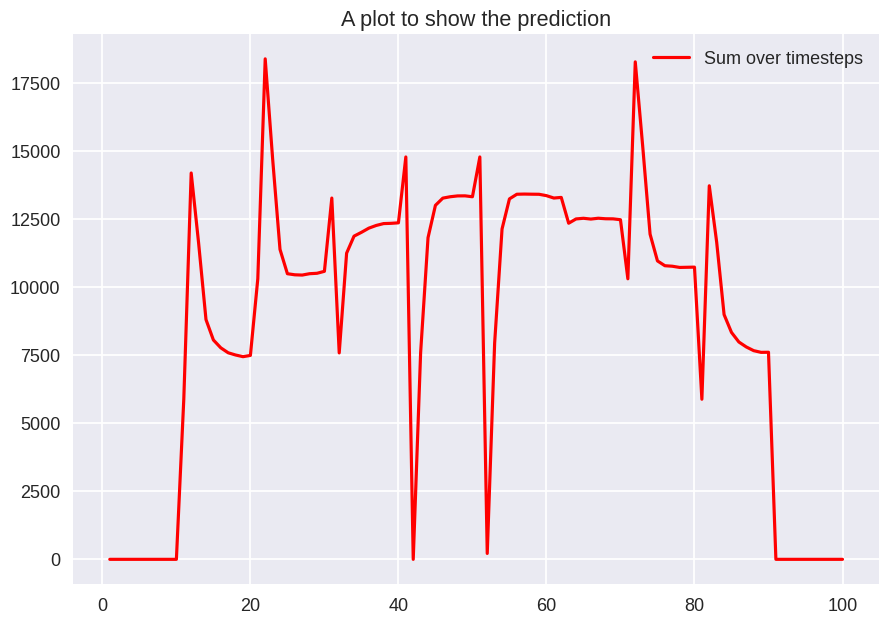

In [98]:
plt.plot(range(1,101),col_sums,c='r', label='Sum over timesteps')
plt.title('A plot to show the prediction')
plt.legend()
plt.show

In [62]:
data_filtered = my_data[:,col_sums >= 250]

# print the filtered array shape
print(data_filtered.shape)

(5000, 78)


In [67]:
#checking the sum of row
col_sums_2 = np.sum(data_filtered, axis=0)

print(col_sums_2.shape[0])

78


<function matplotlib.pyplot.show(close=None, block=None)>

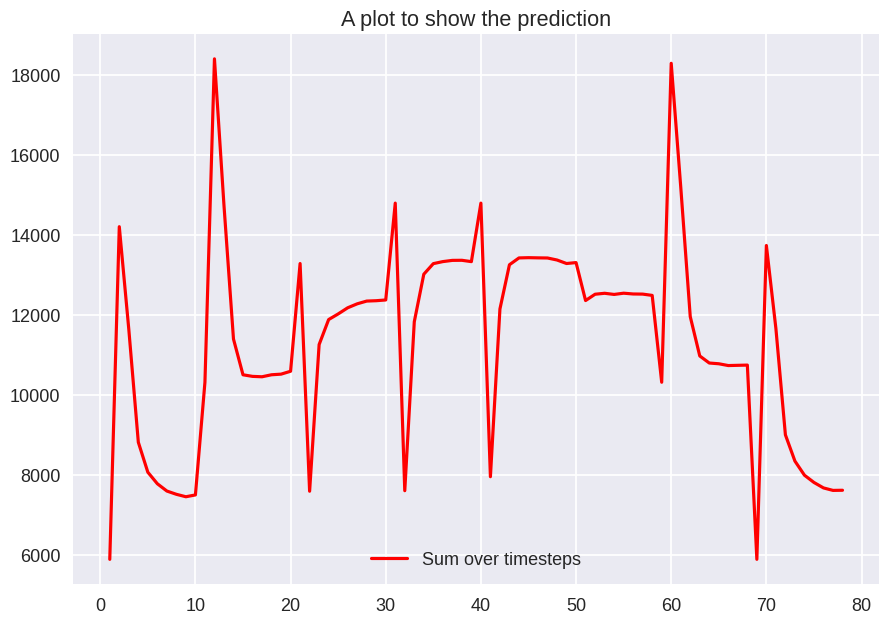

In [99]:
plt.plot(range(1,col_sums_2.shape[0]+1),col_sums_2,c='r', label='Sum over timesteps')
plt.title('A plot to show the prediction')
plt.legend()
plt.show

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

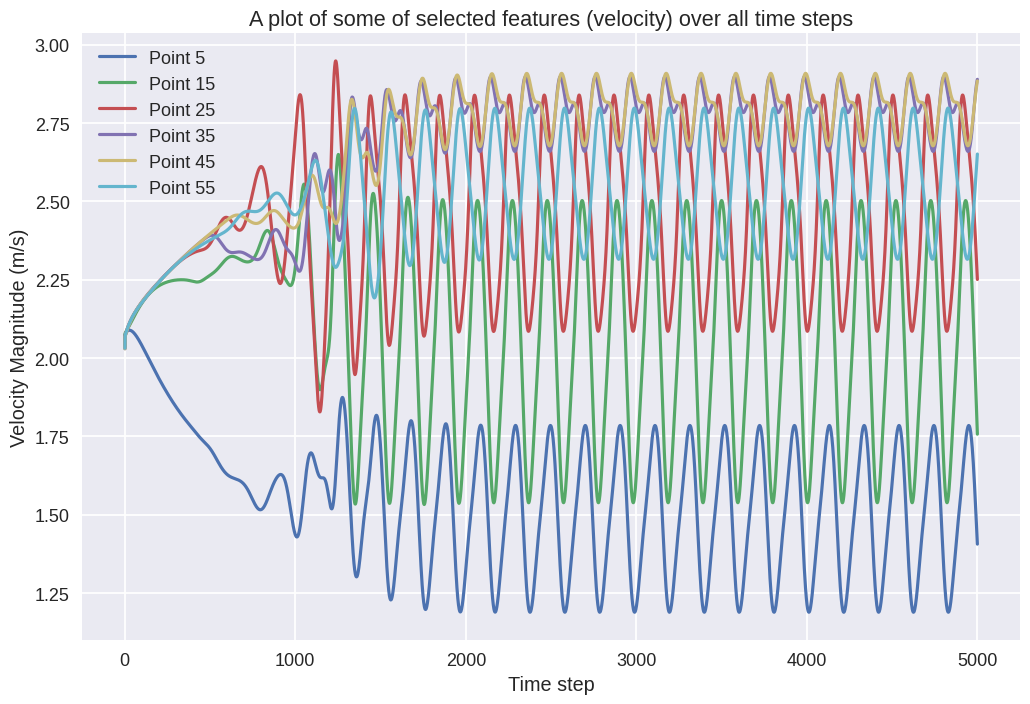

In [104]:
# data visualization
plt.style.use('seaborn-v0_8-talk')
x_axis=range(1,5001)
fid, ax=plt.subplots()
for index in range(5,60,10):
  ax.plot(x_axis,data_filtered[:,index],label="Point " + str(index))

ax.legend(loc='upper left')
ax.set_title("A plot of some of selected features (velocity) over all time steps")
ax.set_xlabel("Time step")
ax.set_ylabel("Velocity Magnitude (m/s)")
plt.tight_layout()
plt.savefig("./after_trim.png")
files.download("after_trim.png") 
plt.show()
plt.show()

In [74]:
max_val=np.amin(my_data)
print(" max value is : ",max_val)
print(np.count_nonzero(my_data <0.01))
#my_data=np.clip(my_data,a_min=1e-2,a_max=3.8)

my_data[my_data>3.8]=3.8
min_val=np.amax(my_data)
print(" min value is : ",min_val) 
print(my_data.shape)

unique, counts =np.unique(my_data,return_counts=True)

print("number of unique numbers is " ,len(unique))


 max value is :  0.08815309536930876
0
 min value is :  3.8
(5000, 78)
number of unique numbers is  384887


In [75]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_all= scaler.fit_transform(my_data)
print(data_all[5,:])

[0.50005584 0.25012502 0.26876196 0.61111046 0.95529345 0.99028769
 0.99040141 0.99014353 0.98949971 0.97350067 0.50000721 0.124573
 0.0269453  0.34319549 0.43310424 0.49277478 0.5094107  0.48758257
 0.46113386 0.42571961 0.55877817 0.96889252 0.49162578 0.37967854
 0.32830518 0.22410391 0.06072382 0.06517385 0.0676508  0.05868714
 0.65851714 0.84079958 0.49439041 0.22264782 0.05075789 0.054019
 0.05511977 0.05559641 0.05232054 0.67495072 0.78500875 0.49896999
 0.19754364 0.04757963 0.05144216 0.05334995 0.05441869 0.05046095
 0.58825963 0.6698192  0.38490696 0.3468773  0.24027682 0.12758575
 0.05511497 0.06235651 0.06513118 0.05249677 0.45443605 0.11423221
 0.0269749  0.26049479 0.34990282 0.39628725 0.42098631 0.41643331
 0.40955202 0.36938499 0.46235486 0.27603106 0.26123294 0.62342308
 0.85440814 0.98877563 0.98906186 0.98893285 0.98849701 0.9660445 ]


In [76]:
#putting some data away for validation
val_data=data_all[-100:,:]
print(val_data.shape)
data=data_all[0:-100,:]
print(data.shape)

(100, 78)
(4900, 78)


In [ ]:
#normalizing the data
"""
max_val=np.amax(my_data)
print(max_val)
data=my_data/max_val
print(data[0,:])
"""

'\nmax_val=np.amax(my_data)\nprint(max_val)\ndata=my_data/max_val\nprint(data[0,:])\n'

In [78]:
#get the nnecessary sequence
num_features=data.shape[1]
num_timesteps = 95
num_predictions = 1 
window_size = num_timesteps+num_predictions


inputs = []
outputs = []
for i in range(len(data) - window_size):
    inputs.append(data[i:i+num_timesteps])
    outputs.append(data[i+num_timesteps:i+num_timesteps+num_predictions])
    
# Convert to NumPy arrays
inputs = np.array(inputs)
outputs = np.array(outputs)
#print(inputs.shape)
#print(outputs.shape)
# Reshape inputs to have a 3D shape (samples, timesteps, features)
inputs = np.reshape(inputs, (inputs.shape[0], num_timesteps, num_features))
outputs=np.reshape(outputs,(outputs.shape[0],num_features))
print("The shape of the input data is: ",inputs.shape)
print("The shape of the output data is: ",outputs.shape)



The shape of the input data is:  (4804, 95, 78)
The shape of the output data is:  (4804, 78)


In [79]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.30, random_state=42)
print(X_train.shape)
print(y_test.shape)


(3362, 95, 78)
(1442, 78)


In [80]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, return_sequences=True, 
    input_shape=(num_timesteps, num_features)),
    tf.keras.layers.LSTM(units=64, return_sequences=True),
    tf.keras.layers.LSTM(units=32, return_sequences=False),
    tf.keras.layers.Dense(units=num_features, activation='sigmoid')
])
model.summary()

model.compile(loss="mse", optimizer="adam",metrics=['mae'])

history = model.fit(X_train, y_train, epochs=15,
          validation_data=(X_test, y_test),batch_size=32)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 95, 128)           105984    
                                                                 
 lstm_1 (LSTM)               (None, 95, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 78)                2574      
                                                                 
Total params: 170,382
Trainable params: 170,382
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
106/106 [==============================] - 41s 323ms/step - loss: 0.0362 - mae: 0.1526 - val_loss: 0.0137 - val_mae: 0.0934
Epoch 2/15
106/106 [===========================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

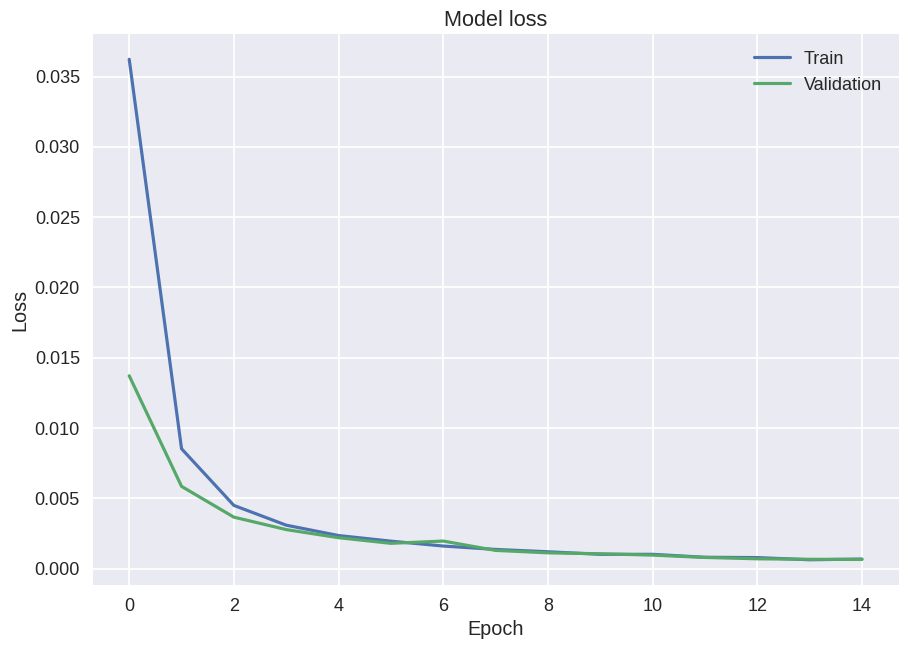

In [106]:
# Train model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("loss.png")
files.download("loss.png") 
plt.show()

In [85]:
mse_test = model.evaluate(X_test, y_test)
print( model.metrics_names)
print(type(mse_test))

46/46 [==============================] - 4s 76ms/step - loss: 6.4298e-04 - mae: 0.0182
['loss', 'mae']
<class 'list'>


In [86]:
print("MSE on test set is  {mse_val} and MAE is {mae}".format(mse_val=mse_test[0],mae=mse_test[1]))

#print(f"MSE on test set: {mse_test:.3f}")

MSE on test set is  0.0006429778295569122 and MAE is 0.01815277896821499


In [87]:
print(val_data.shape)
print(val_data[:num_timesteps,:].shape)
final_test_data=val_data[:num_timesteps,:].reshape(1,num_timesteps,num_features)
#reserv= np.reshape(reserved_data, (reserved_data.shape[0], num_timesteps, num_features))
print(final_test_data.shape)
print(val_data.shape)

(100, 78)
(95, 78)
(1, 95, 78)
(100, 78)


(1, 95, 78)
i is now 0
1/1 [==============================] - 0s 38ms/step
i is now 1
1/1 [==============================] - 0s 51ms/step
i is now 2
1/1 [==============================] - 0s 47ms/step
i is now 3
1/1 [==============================] - 0s 49ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

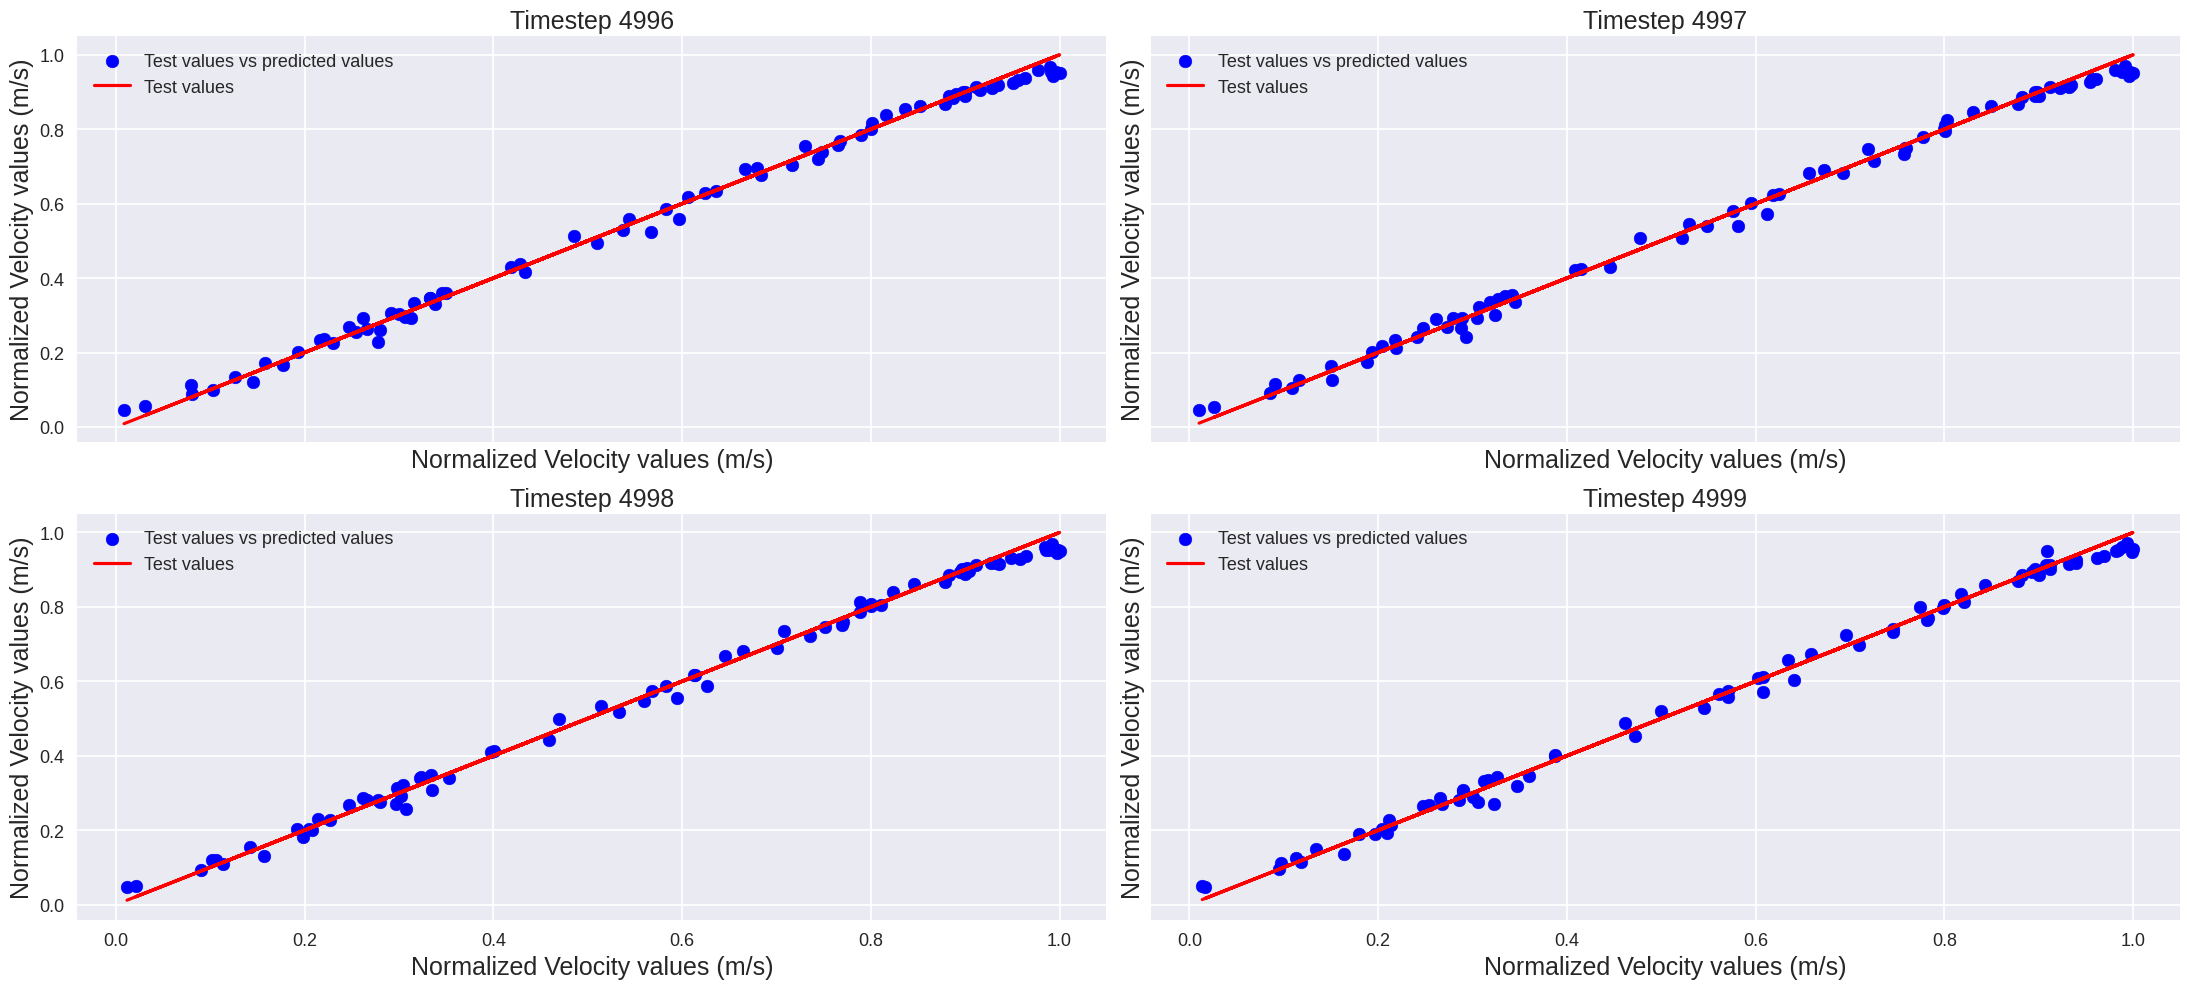

In [115]:
import matplotlib.pyplot as plt

final_test_data = val_data[:num_timesteps, :].reshape(1, num_timesteps, num_features)
print(final_test_data.shape)
fig, axs = plt.subplots(2, 2, figsize=(22, 10), sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    print("i is now",i)
    prediction = model.predict(final_test_data)
    prediction = prediction.reshape(1, 1, num_features)
    last_ten_temp = np.concatenate([final_test_data[:, 1:, :], prediction], axis=1)
    #print("the sahpe o last temp data is now",last_ten_temp.shape)

    #print("Prediction ", i+1, " is :", prediction[0][0])

    ax.scatter(val_data[num_timesteps+i,:], prediction[0][0], c='b', label='Test values vs predicted values')
    ax.plot(val_data[num_timesteps+i,:], val_data[num_timesteps+i,:], c='r', label='Test values')
    if i <5:
      ax.set_title(f'Timestep {i+4900+num_timesteps+1}',fontsize=18)
      ax.set_xlabel("Normalized Velocity values (m/s)",fontsize=18)
      ax.set_ylabel("Normalized Velocity values (m/s)",fontsize=18)

    ax.legend()

    # update final_test_data with the new prediction
    final_test_data = last_ten_temp
    #val_data = val_data[1:,:]
plt.savefig("results.png")
files.download("results.png") 

plt.tight_layout()
plt.show()
